## N차 과제 - API Scrapping_Reddit

- 주제: API를 활용한 데이터 불러오기 및 분석
- 데이터: 커뮤니티 텍스트 데이터(API 활용)
- 사용 라이브러리: praw, wordcloud, seaborn, nltk

### 1. 라이브러리 및 API 설정

1.1 미국 최대 커뮤니티 중 하나인 레딧(Reddit)에서 데이터를 불러오기 위해 praw 라이브러리를 install 해야 합니다.

In [1]:
!pip install praw

1.2 라이브러리 설정

In [2]:
import praw
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter

1.3 자연어처리를 위해 사용할 nltk 패키지를 다운로드하겠습니다(NLP 과제가 아니므로 자세히 살펴보지는 않겠습니다).

궁금하신 분들을 위해!
https://datascienceschool.net/03%20machine%20learning/03.01.01%20NLTK%20%EC%9E%90%EC%97%B0%EC%96%B4%20%EC%B2%98%EB%A6%AC%20%ED%8C%A8%ED%82%A4%EC%A7%80.html

In [3]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

1.4 API 인증을 받겠습니다. 절차의 경우 추가로 첨부한 자료를 참고해주세요.
### **과제를 제출할 때는 본 항목의 API 키들은 모두 지우고 제출해주세요! 공유되면 안 됩니다.**

In [4]:
#Reddit API 인증
reddit = praw.Reddit(
    client_id='',
    client_secret='',
    user_agent=''
)

### 2. 데이터 수집 및 분석

2.1 본격적으로 API를 활용해 데이터를 불러오겠습니다. 먼저 subreddit을 'stocks'로 설정하고 엔비디아 주식에 대한 게시글을 가져오겠습니다.

In [5]:
subreddit_name = 'stocks'
search_query = 'NVIDIA OR NVDA'
subreddit = reddit.subreddit(subreddit_name)
top_posts = subreddit.search(search_query, limit=300, sort='top')


2.2 가져온 데이터를 제목과 내용으로 분리된 데이터프레임으로 변환하세요.

In [6]:
top_posts_data = []
for post in top_posts:
    top_posts_data.append({
        'Title': post.title,
        'Text': post.selftext
    })

df = pd.DataFrame(top_posts_data)

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



In [7]:
df

,Title,Text
0,A note to young investors (or new investors),As the Fed caused a bit of a ripple in the mar...
1,To all of you who are red this year while the ...,Lately I keep hearing the same old narrative f...
2,Pelosi's husband buying over $1 million of com...,[Full Article](https://www.msn.com/en-us/tv/ne...
3,Beware of what AMC shorts are holding!,I understand that most people in this thread i...
4,Blackberry -- A Dormant Giant,###**Abbreviation Index:**\n\nBB -- Blackberry...
...,...,...
230,"Here is a Market Recap for today Thursday, Nov...","**PsychoMarket Recap - Thursday, November 18, ..."
231,TSMC sales grow 45% in July on strong AI chip ...,(Bloomberg) -- Taiwan Semiconductor Manufactur...
232,"META Still The Cheapest of The Magnificent 7, ...",Quick glance at some of the numbers for META. ...
233,Made 30% since I started trading 7 months ago ...,"Hello folks, \n\nI am a 24 year old who starte..."


2.3 가져온 데이터를 토큰화, 불용어 제거 등 분석에 활용하기 위한 전처리를 진행하세요.

In [8]:
word_tokens = []
for text in df['Text']:
    tokens = word_tokenize(text)
    word_tokens.extend(tokens)

In [9]:
word_tokens

['As',
 'the',
 'Fed',
 'caused',
 'a',
 'bit',
 'of',
 'a',
 'ripple',
 'in',
 'the',
 'market',
 'today',
 'and',
 'I',
 'considered',
 'vacating',
 'a',
 'position',
 '(',
 'but',
 'ultimately',
 'did',
 "n't",
 ')',
 '.',
 'I',
 'thought',
 'a',
 'little',
 'bit',
 'about',
 'my',
 'journey',
 'over',
 'the',
 'years',
 'and',
 'thought',
 'I',
 "'d",
 'share',
 'a',
 'story',
 'and',
 'a',
 'few',
 'things',
 'I',
 "'ve",
 'learned',
 '.',
 'Back',
 'in',
 '2003',
 ',',
 'I',
 'made',
 'my',
 'first',
 'move',
 'in',
 'the',
 'stock',
 'market',
 'by',
 'taking',
 'an',
 '$',
 '1800',
 'tax',
 'return',
 'and',
 'buying',
 '200',
 'shares',
 'of',
 'a',
 'coal',
 'company',
 'called',
 'Consol',
 '.',
 'At',
 'the',
 'time',
 'it',
 'traded',
 'under',
 'the',
 'symbol',
 'CNX',
 '.',
 'I',
 'bought',
 'it',
 'with',
 'almost',
 'no',
 'DD',
 'simply',
 'because',
 'it',
 'paid',
 'a',
 'pretty',
 'good',
 'dividend',
 '.',
 '(',
 'Around',
 '.50/share',
 'if',
 'I',
 'recall',
 '

In [10]:
stop_words = set(stopwords.words('english'))

result = []
for word in word_tokens:
    if word not in stop_words:
        result.append(word)

print('불용어 제거 전 :',word_tokens)
print('불용어 제거 후 :',result)

불용어 제거 전 : ['As', 'the', 'Fed', 'caused', 'a', 'bit', 'of', 'a', 'ripple', 'in', 'the', 'market', 'today', 'and', 'I', 'considered', 'vacating', 'a', 'position', '(', 'but', 'ultimately', 'did', "n't", ')', '.', 'I', 'thought', 'a', 'little', 'bit', 'about', 'my', 'journey', 'over', 'the', 'years', 'and', 'thought', 'I', "'d", 'share', 'a', 'story', 'and', 'a', 'few', 'things', 'I', "'ve", 'learned', '.', 'Back', 'in', '2003', ',', 'I', 'made', 'my', 'first', 'move', 'in', 'the', 'stock', 'market', 'by', 'taking', 'an', '$', '1800', 'tax', 'return', 'and', 'buying', '200', 'shares', 'of', 'a', 'coal', 'company', 'called', 'Consol', '.', 'At', 'the', 'time', 'it', 'traded', 'under', 'the', 'symbol', 'CNX', '.', 'I', 'bought', 'it', 'with', 'almost', 'no', 'DD', 'simply', 'because', 'it', 'paid', 'a', 'pretty', 'good', 'dividend', '.', '(', 'Around', '.50/share', 'if', 'I', 'recall', 'correctly', '.', ')', 'This', 'is', 'back', 'when', 'internet', 'trading', 'really', 'was', "n't", 'a', 

2.4 전처리된 데이터를 활용해 어떤 단어가 가장 많이 나왔는지 WordCloud를 통해 확인하세요.

In [11]:
text=' '.join(result)

In [12]:
wordcloud = WordCloud(random_state=42,width=800, height=400, background_color='grey').generate(text)
wordcloud  # 객체 주소값

In [13]:
# words_ : 객체의 비율의 정보가 담긴 딕셔너리를 반환
wordcloud.words_

{'Nvidia': 1.0,
 'stock': 0.8179824561403509,
 'year': 0.7521929824561403,
 'company': 0.6403508771929824,
 'said': 0.6381578947368421,
 'market': 0.5833333333333334,
 'companies': 0.5789473684210527,
 'Intel': 0.5701754385964912,
 'new': 0.5504385964912281,
 'https': 0.543859649122807,
 'chip': 0.5350877192982456,
 'one': 0.5109649122807017,
 'AMD': 0.3969298245614035,
 'earnings release': 0.3969298245614035,
 'AI': 0.3881578947368421,
 '_ _': 0.36403508771929827,
 'price': 0.33114035087719296,
 "n't": 0.3267543859649123,
 'time': 0.3267543859649123,
 'NVDA': 0.3267543859649123,
 'well': 0.31798245614035087,
 'S P': 0.31140350877192985,
 'sale': 0.3092105263157895,
 'GPU': 0.3092105263157895,
 'company s': 0.29605263157894735,
 's': 0.27631578947368424,
 'make': 0.2719298245614035,
 'still': 0.2675438596491228,
 'imgur': 0.25877192982456143,
 'billion': 0.2543859649122807,
 'Tesla': 0.25219298245614036,
 'big': 0.25,
 'people': 0.24780701754385964,
 'per share': 0.24780701754385964,
 

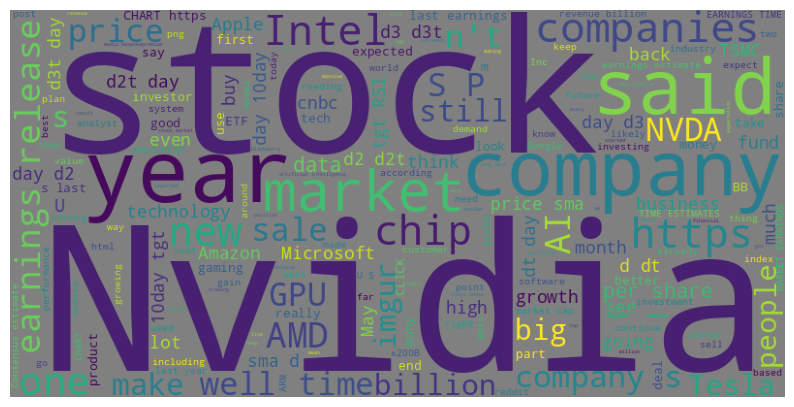

In [14]:
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

2.6 가장 많이 나온 단어에는 어떤 것들이 있는지 barplot을 그려 확인하세요.

In [15]:
word_freq=wordcloud.process_text(text)
word_freq

{'Fed': 41,
 'caused': 11,
 'bit': 28,
 'ripple': 2,
 'market': 266,
 'today': 70,
 'considered': 7,
 'vacating': 1,
 'position': 49,
 'ultimately': 11,
 "n't": 149,
 'thought': 37,
 'little': 23,
 'journey': 4,
 'share': 86,
 'story': 15,
 've': 53,
 'learned': 9,
 'back': 107,
 'made': 54,
 'first': 79,
 'stock': 373,
 'taking': 24,
 'tax': 1,
 'return': 51,
 'buying': 10,
 'coal': 3,
 'company': 292,
 'called': 42,
 'Consol': 3,
 'time': 149,
 'traded': 3,
 'symbol': 4,
 'CNX': 1,
 'bought': 45,
 'almost': 30,
 'DD': 5,
 'simply': 14,
 'paid': 8,
 'pretty': 25,
 'good': 79,
 'dividend': 33,
 'around': 67,
 'recall': 5,
 'correctly': 1,
 'internet': 20,
 'trading': 47,
 'really': 75,
 'thing': 67,
 'bank': 17,
 'trade': 31,
 'cost': 69,
 'actually': 35,
 'call': 7,
 'broker': 2,
 'place': 31,
 'phone': 10,
 'Ancient': 3,
 'right': 71,
 'lol': 8,
 'figured': 5,
 'win': 11,
 'lose': 16,
 'draw': 2,
 'eventually': 13,
 'pay': 34,
 'follow': 13,
 'much': 102,
 'holding': 31,
 'realized':

In [16]:
top20_freq = dict(sorted(word_freq.items(), key = lambda item: item[1],reverse=True)[:20])
top20_freq

{'Nvidia': 456,
 'stock': 373,
 'year': 343,
 'company': 292,
 'said': 291,
 'market': 266,
 'companies': 264,
 'Intel': 260,
 'new': 251,
 'https': 248,
 'chip': 244,
 'one': 233,
 'AMD': 181,
 'earnings release': 181,
 'AI': 177,
 '_ _': 166,
 'price': 151,
 "n't": 149,
 'time': 149,
 'NVDA': 149}

<ipython-input-17-4671ffc77f15>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(top20_freq.values()), y=list(top20_freq.keys()),palette='viridis')


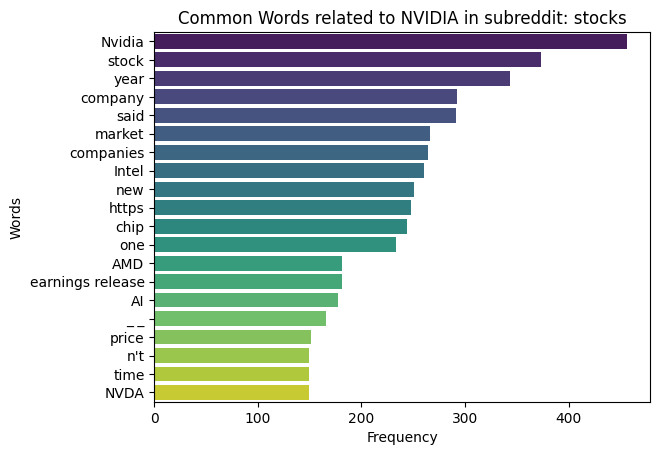

In [17]:
sns.barplot(x=list(top20_freq.values()), y=list(top20_freq.keys()),palette='viridis')
plt.title('Common Words related to NVIDIA in subreddit: stocks')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()

# **제출 시 API 인증 부분의 id, secret은 모두 지우고 제출해주세요!**

### 3. 자유 분석

위에서 진행한 분석만으로는 유의미한 인사이트를 도출하기는 어렵습니다. 추가적인 분석을 통해 해당 주식에 대한 평가가 긍정적인지, 또는 어떠한 이슈가 있는지 확인하는 것과 같은 추가적인 분석을 진행해주세요. 게시글이 아닌 리뷰를 가져오는 것도 가능합니다.

또한 본 분석에서 사용한 데이터가 아닌 다른 데이터를 활용하거나 또 다른 커뮤니티 혹은 사이트에서 API를 받아와 새로운 주제를 가지고 분석하는 것도 좋습니다:)

## **생성형 ai 기반 감성분석**

In [18]:
!pip install --upgrade google-cloud-language


In [23]:
#환경변수 설정

import os

# 서비스 계정 키 파일의 경로를 설정합니다.
# 업로드된 파일의 이름을 정확히 입력합니다.
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = #"mypath"

In [25]:
from google.cloud import language_v1

In [28]:
# Google Cloud Natural Language API 클라이언트 생성
client = language_v1.LanguageServiceClient()

def analyze_sentiment(text):
    """
    입력 텍스트의 감정을 분석하여 긍정, 보통, 부정을 판별합니다.

    Parameters:
    text (str): 분석할 텍스트

    Returns:
    dict: 분석 결과 (감정 점수, 감정 강도, 감정 분류)
    """
    # 분석할 텍스트와 문서 유형을 지정
    document = language_v1.Document(content=text, type_=language_v1.Document.Type.PLAIN_TEXT)

    # 감정 분석 요청 수행
    response = client.analyze_sentiment(request={"document": document})
    sentiment = response.document_sentiment

    # 감정 점수 및 강도 추출
    score = sentiment.score
    magnitude = sentiment.magnitude

    # 감정 점수에 따른 분류
    if score > 0.25:
        sentiment_label = "Positive"  # 긍정
    elif score < -0.25:
        sentiment_label = "Negative"  # 부정
    else:
        sentiment_label = "Neutral"   # 보통 (중립)

    # 결과 출력
    #print(f"Text: {text}")
    #print(f"Sentiment Score: {score:.2f}")
    #print(f"Sentiment Magnitude: {magnitude:.2f}")
    #print(f"Sentiment Analysis Result: {sentiment_label}")

    # 결과 반환
    return {
        "score": score,
        "magnitude": magnitude,
        "sentiment": sentiment_label
    }


In [39]:
analysis=[]

for text in df['Text']:
    analysis.append(analyze_sentiment(text))


In [30]:
df_analysis=pd.DataFrame(analysis)
df_analysis

,score,magnitude,sentiment
0,0.0,27.600000,Neutral
1,-0.2,6.100000,Neutral
2,-0.2,7.900000,Neutral
3,0.1,16.900000,Neutral
4,0.0,75.900002,Neutral
...,...,...,...
230,0.0,10.400000,Neutral
231,0.0,6.600000,Neutral
232,0.1,4.200000,Neutral
233,0.1,12.700000,Neutral


In [35]:
df_analysis['sentiment'].value_counts()

,count
sentiment,
Neutral,187
Negative,37
Positive,11


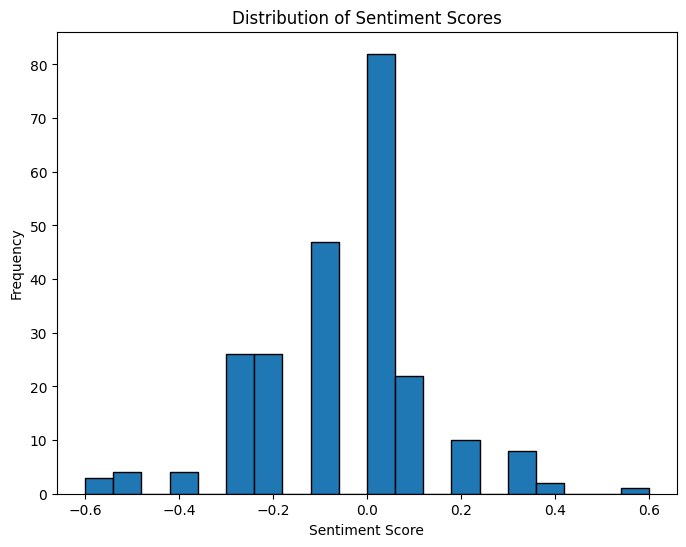

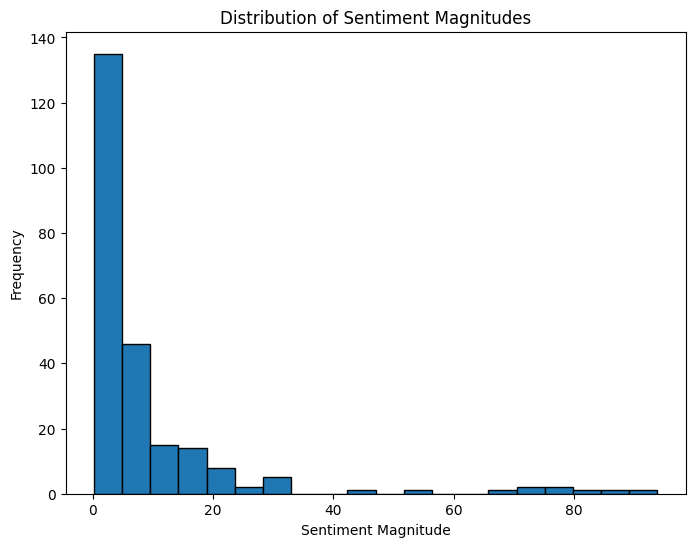

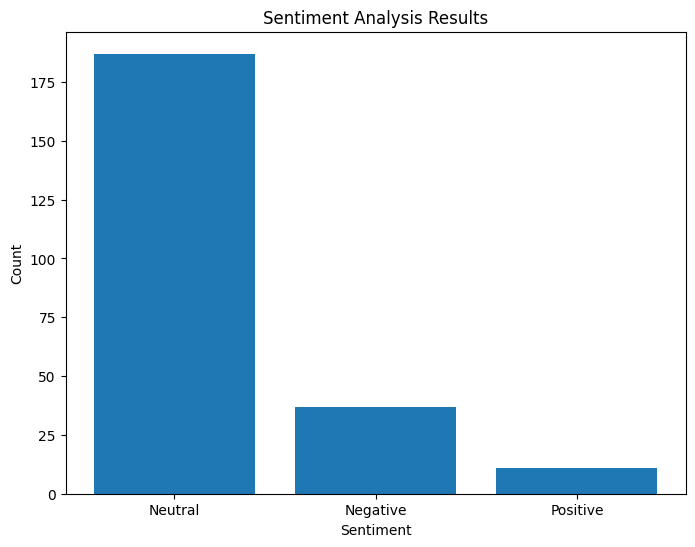

In [31]:
import matplotlib.pyplot as plt

# Score 히스토그램
plt.figure(figsize=(8, 6))
plt.hist(df_analysis['score'], bins=20, edgecolor='black')
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

# Magnitude 히스토그램
plt.figure(figsize=(8, 6))
plt.hist(df_analysis['magnitude'], bins=20, edgecolor='black')
plt.title('Distribution of Sentiment Magnitudes')
plt.xlabel('Sentiment Magnitude')
plt.ylabel('Frequency')
plt.show()

# Sentiment 막대 그래프
sentiment_counts = df_analysis['sentiment'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.title('Sentiment Analysis Results')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


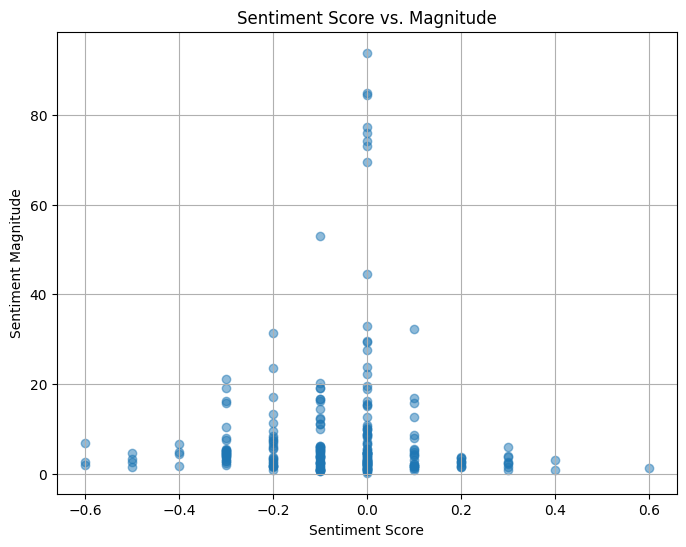

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(df_analysis['score'], df_analysis['magnitude'], alpha=0.5)
plt.title('Sentiment Score vs. Magnitude')
plt.xlabel('Sentiment Score')
plt.ylabel('Sentiment Magnitude')
plt.grid(True)
plt.show()


중립적인 태도의 글이 많지만 nvidia에 대해 긍정보다는 부정에 가까운 감정을 가지고있다.
또한 부정적인 글들이 감정의 격양도(magnitude)가 조금 더 높은 것을 확인할 수 있다.

긴 글이라 제대로 반영이 되지 않았을 가능성이 있어 글의 첫 500자로 다시 진행해보았다.

In [65]:
analysis=[]

for text in df['Text']:
    analysis.append(analyze_sentiment(text[:500]))


In [66]:
df_analysis500=pd.DataFrame(analysis)
df_analysis500

,score,magnitude,sentiment
0,0.1,1.2,Neutral
1,-0.2,1.4,Neutral
2,0.0,0.2,Neutral
3,-0.2,1.6,Neutral
4,0.0,2.7,Neutral
...,...,...,...
230,0.2,1.3,Neutral
231,0.1,0.7,Neutral
232,0.2,1.3,Neutral
233,0.0,2.4,Neutral


In [67]:
df_analysis500['sentiment'].value_counts()

,count
sentiment,
Neutral,181
Negative,36
Positive,18


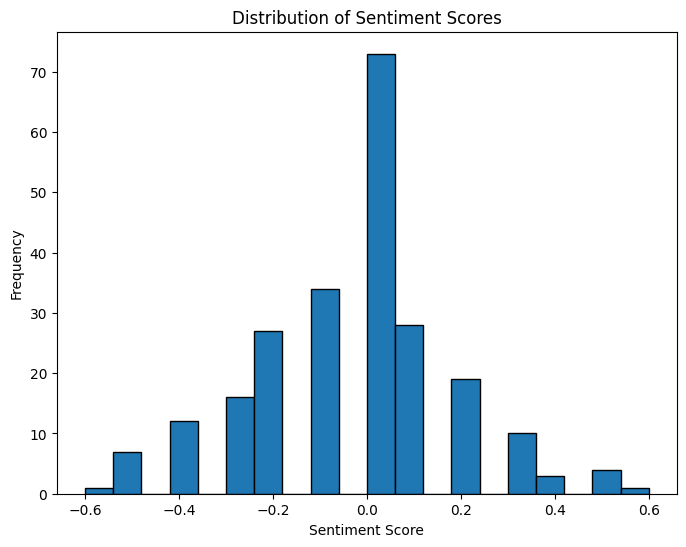

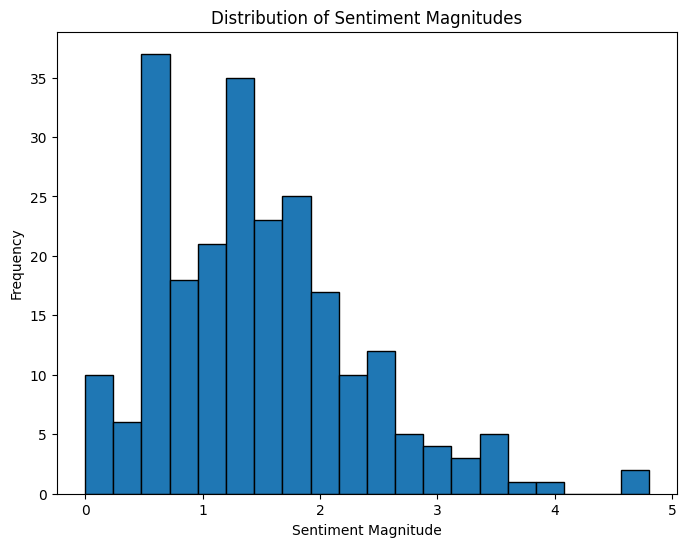

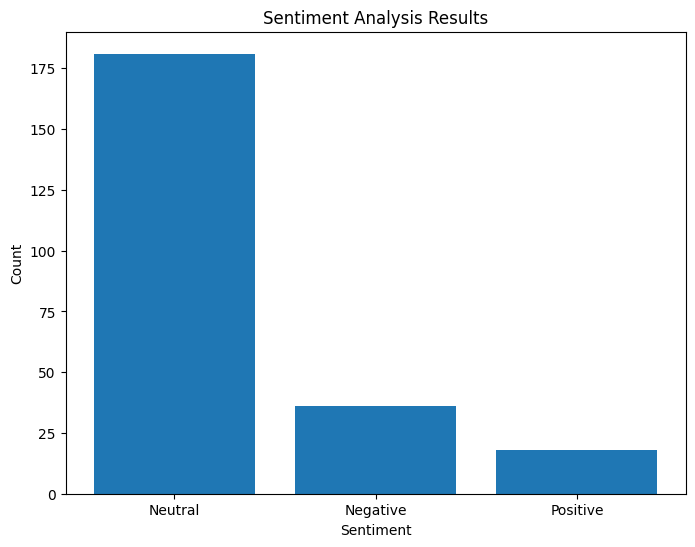

In [68]:
import matplotlib.pyplot as plt

# Score 히스토그램
plt.figure(figsize=(8, 6))
plt.hist(df_analysis500['score'], bins=20, edgecolor='black')
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

# Magnitude 히스토그램
plt.figure(figsize=(8, 6))
plt.hist(df_analysis500['magnitude'], bins=20, edgecolor='black')
plt.title('Distribution of Sentiment Magnitudes')
plt.xlabel('Sentiment Magnitude')
plt.ylabel('Frequency')
plt.show()

# Sentiment 막대 그래프
sentiment_counts = df_analysis500['sentiment'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.title('Sentiment Analysis Results')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


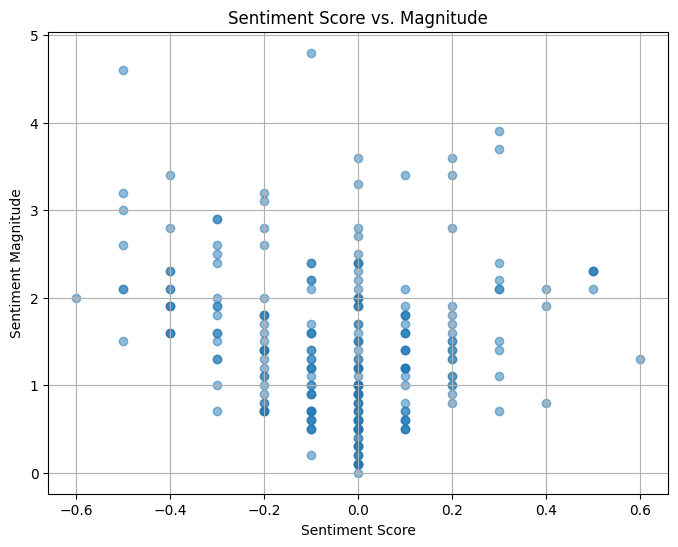

In [69]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(df_analysis500['score'], df_analysis500['magnitude'], alpha=0.5)
plt.title('Sentiment Score vs. Magnitude')
plt.xlabel('Sentiment Score')
plt.ylabel('Sentiment Magnitude')
plt.grid(True)
plt.show()


500,300,100으로 글자수를 줄여보니 글자수가 줄어들 수록 중립비율이 줄고 긍정 부정이 늘어났다.
500은 그래도 부정의 수가 긍정보다 높았다. 100자로 했을 땐 긍정과 부정의 수가 47과 46으로 비슷했다.
길어질 수록 감정이 희석됨을 알 수 있다.

이를 보완하려면, 긴 글을 여러개로 나눠서 분석을 실시하고 점수를 평균을 내는 등의 방식을 활용할 수 있을 것이다.